Лабораторна 5 Сеньків Маркіян ТР-31

C:\Users\Admin\AppData\Local\Temp\ipykernel_11568\2064117333.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCleaned['sex'] = dfCleaned['sex'].apply(sex_to_int)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11568\2064117333.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCleaned['cp'] = dfCleaned['cp'].apply(cp_to_int)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11568\2064117333.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

<Axes: >

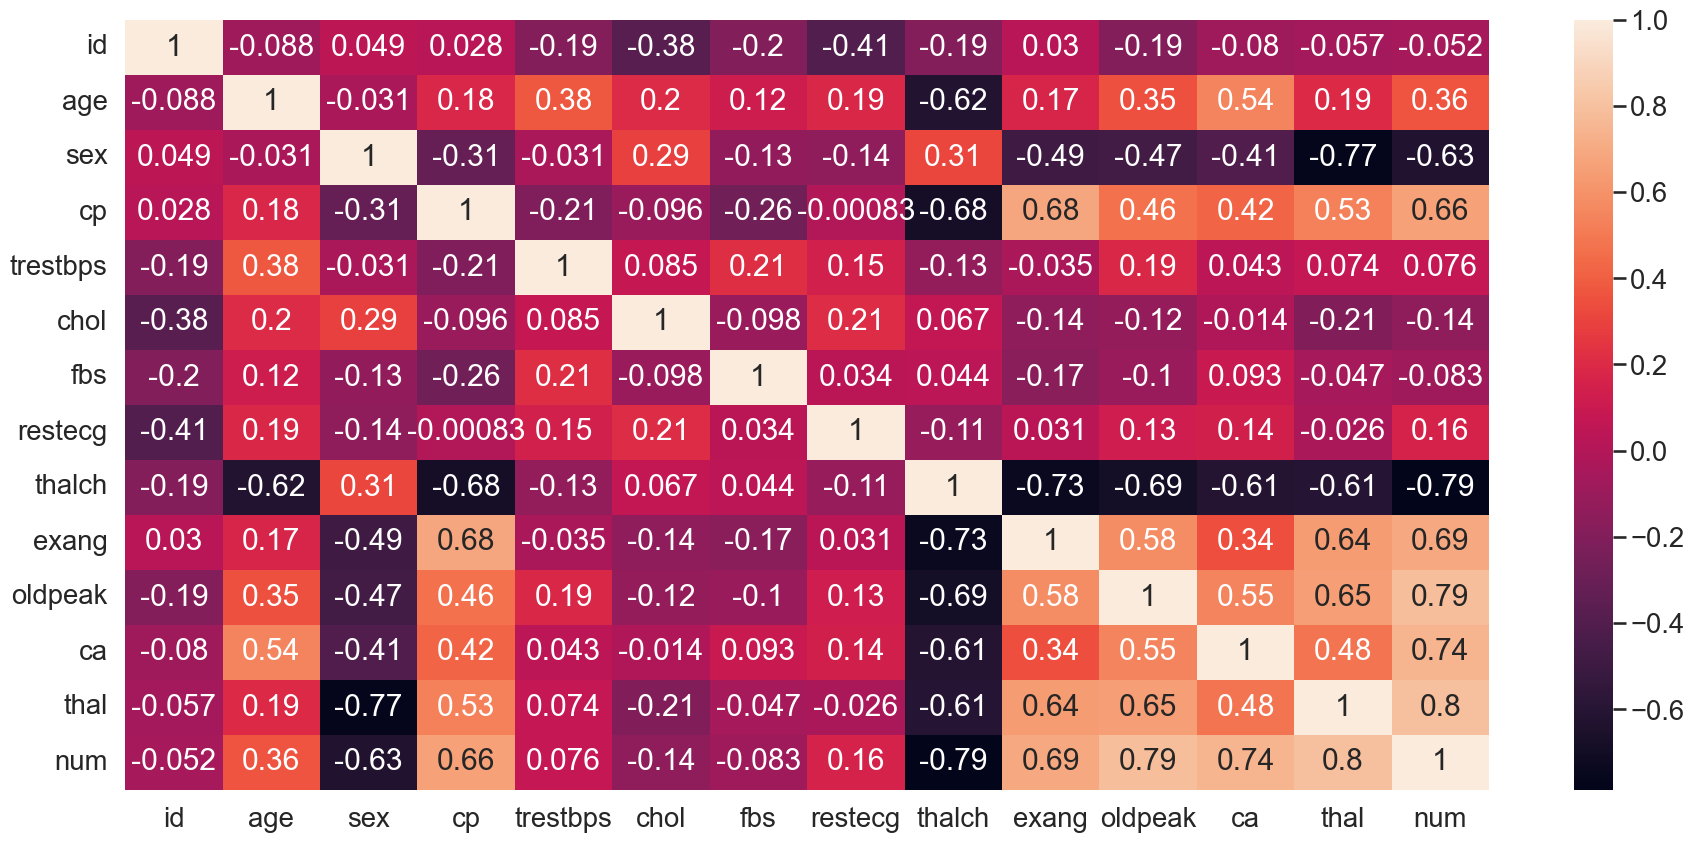

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Функція для перетворення статі з стрічки на цілі числа з умовою
def sex_to_int(value):
    if value == 'Male':  
        return 1  # Чоловік
    else:
        return 2  # Жінка
    
# Функція для перетворення cp (типу болю в грудях) з стрічки на цілі числа з умовою
def cp_to_int(value):
    if value == 'typical angina':
        return 1 
    elif value == 'atypical angina':
        return 2
    elif value == 'non-anginal':
        return 3
    elif value == 'asymptomatic':
        return 4
    else:
        print("CP="+value)
        return 0  #інше

# Функція для перетворення restecg(результати електрокардіограції в спокої) з стрічки на цілі числа з умовою
def restecg_to_int(value):
    if value == 'normal':
        return 1  
    elif value == 'st-t abnormality':
        return 2
    elif value == 'lv hypertrophy':
        return 3
    else:
        print("restecg="+value)
        return 0  #інше

# Функція для перетворення thal з стрічки на цілі числа з умовою
def thal_to_int(value):
    if value == 'normal':
        return 1  
    elif value == 'fixed defect':
        return 2
    elif value == 'reversable defect':
        return 3
    else:
        print("thal="+value)
        return 0  #інше

#columna = ["id", "age", "sex", "dataset", "cp", "trestbps", "chol", "fbs", "restecg", "thalch", "exang", "oldpeak", "slope", "ca", "thal", "num"]
dfHeartDiseaseUci = pd.read_csv('heart_disease_uci.csv')

#видалити рядки з пустими значеннями
dfCleaned = dfHeartDiseaseUci.dropna()

# Замінити значення у стовпці 'sex' на int (1-Male, 2-Female)
dfCleaned['sex'] = dfCleaned['sex'].apply(sex_to_int)

# Замінити значення у стовпці 'cp' на int (1-typical angina, 2-atypical angina, 3-non-anginal, 4-asymptomatic)
dfCleaned['cp'] = dfCleaned['cp'].apply(cp_to_int)

# Замінити значення у стовпці 'restecg' на int (1-normal, 2-stt abnormality, 3-lv hypertrophy)
dfCleaned['restecg'] = dfCleaned['restecg'].apply(restecg_to_int)

# Замінити значення у стовпці 'sex' на int (1-, 2-)
dfCleaned['thal'] = dfCleaned['thal'].apply(thal_to_int)

# Видаляємо колонки з стрічками
columns_to_drop = ['dataset', 'slope']
dfCleaned = dfCleaned.drop(columns=columns_to_drop)

#Побудова кореляційної матриці
correlation_matrix = dfCleaned.corr()

# Виведення кореляційної матриці
#print(correlation_matrix)
sns.set(rc={'figure.figsize':(22,10)})
sns.set_context("talk", font_scale=1.2)
sns.heatmap(
    correlation_matrix.loc[:, ["id", "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalch", "exang", "oldpeak", "ca", "thal", "num"]].corr(),
    annot=True
)

PCA:

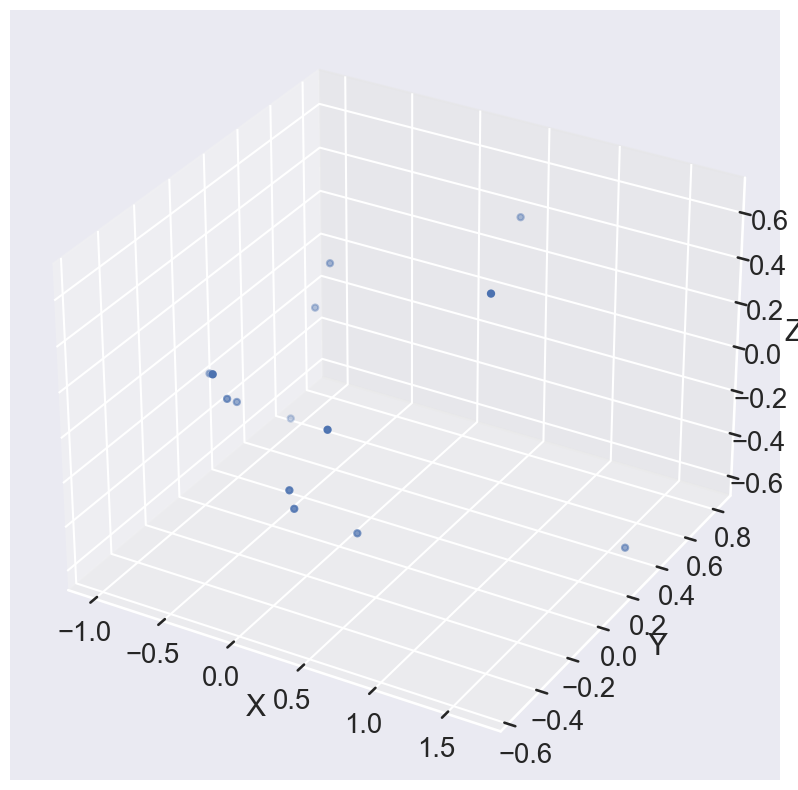

In [37]:
pca = PCA(n_components=3)
pca.fit(correlation_matrix)

transformed_data = pca.transform(correlation_matrix)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Виводимо transformed data points
ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2])

# Задаємо координати
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


Дашборди

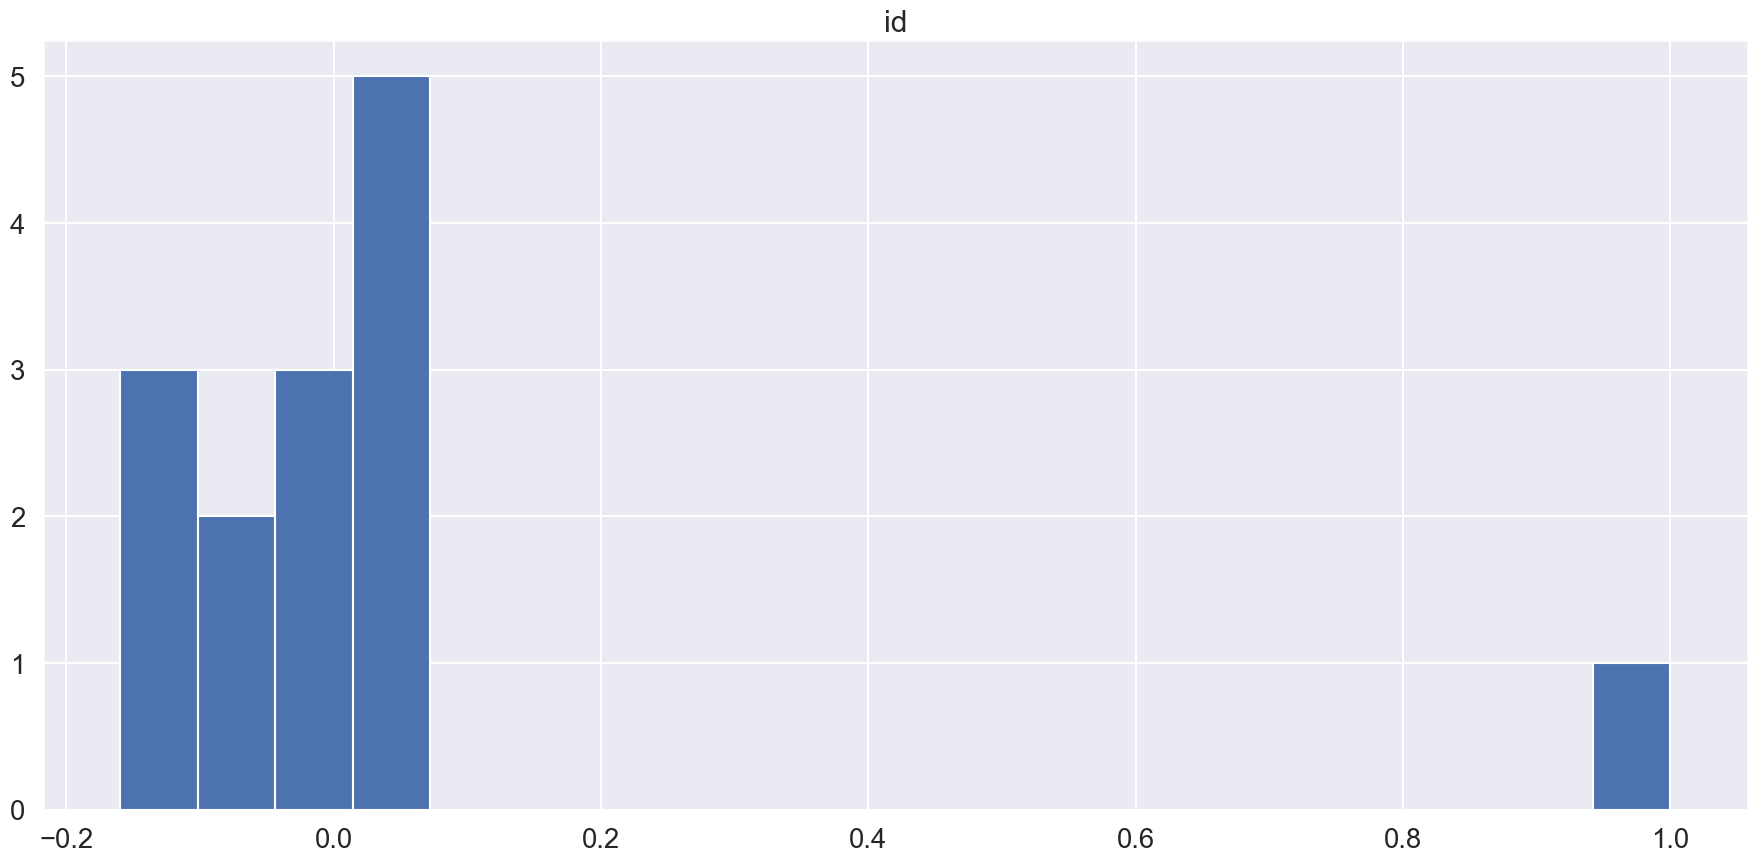

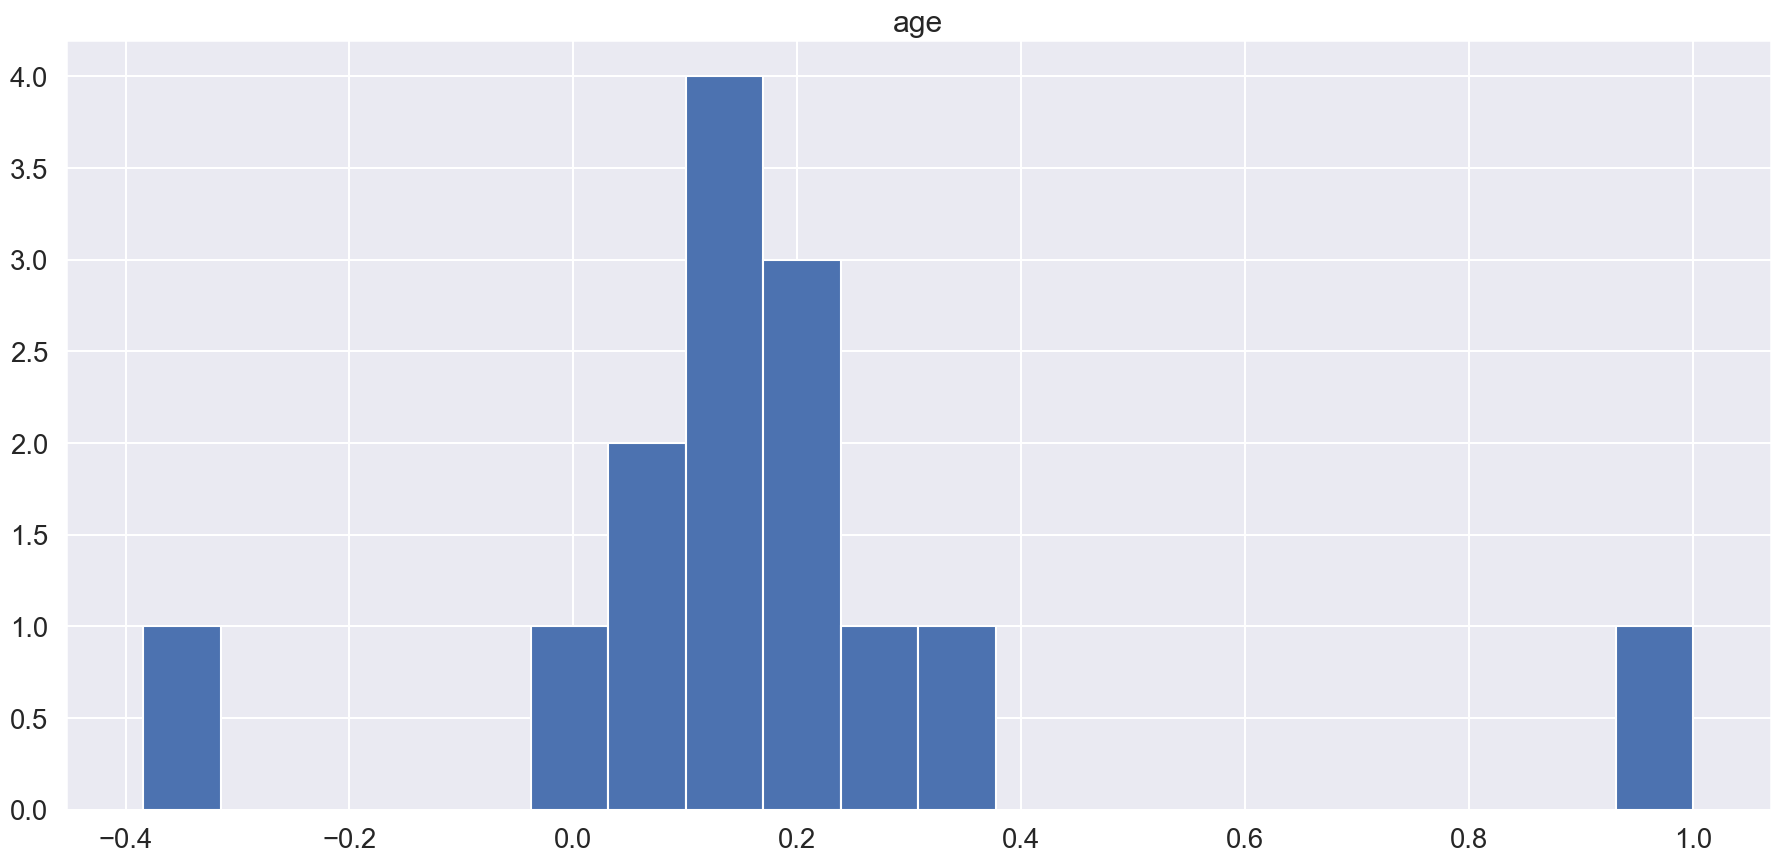

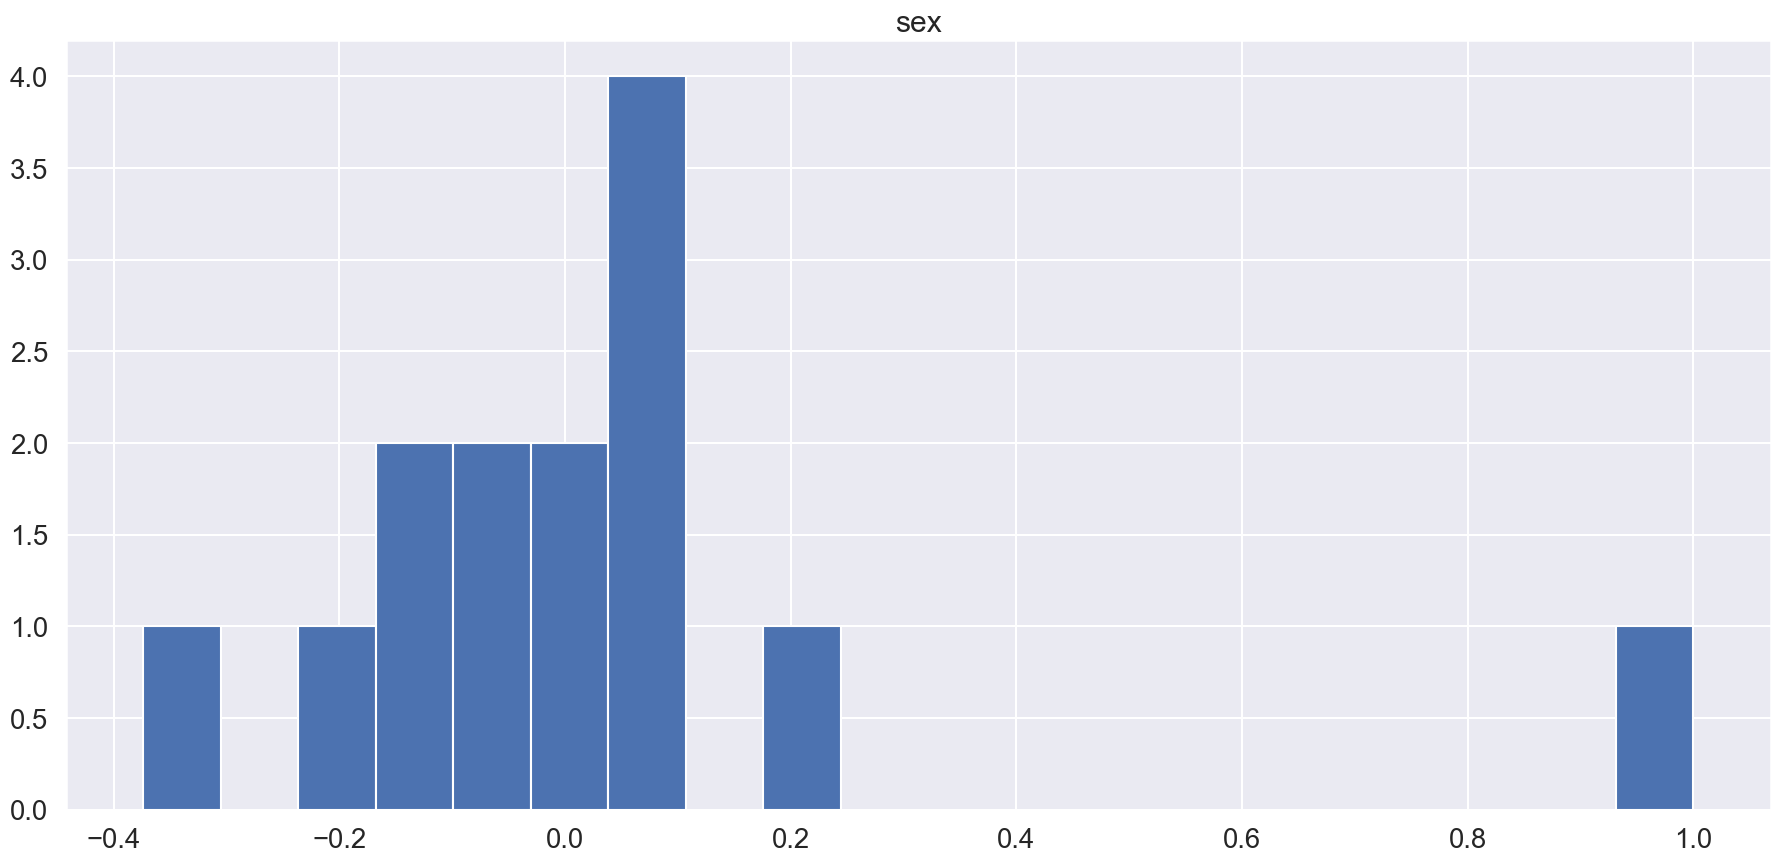

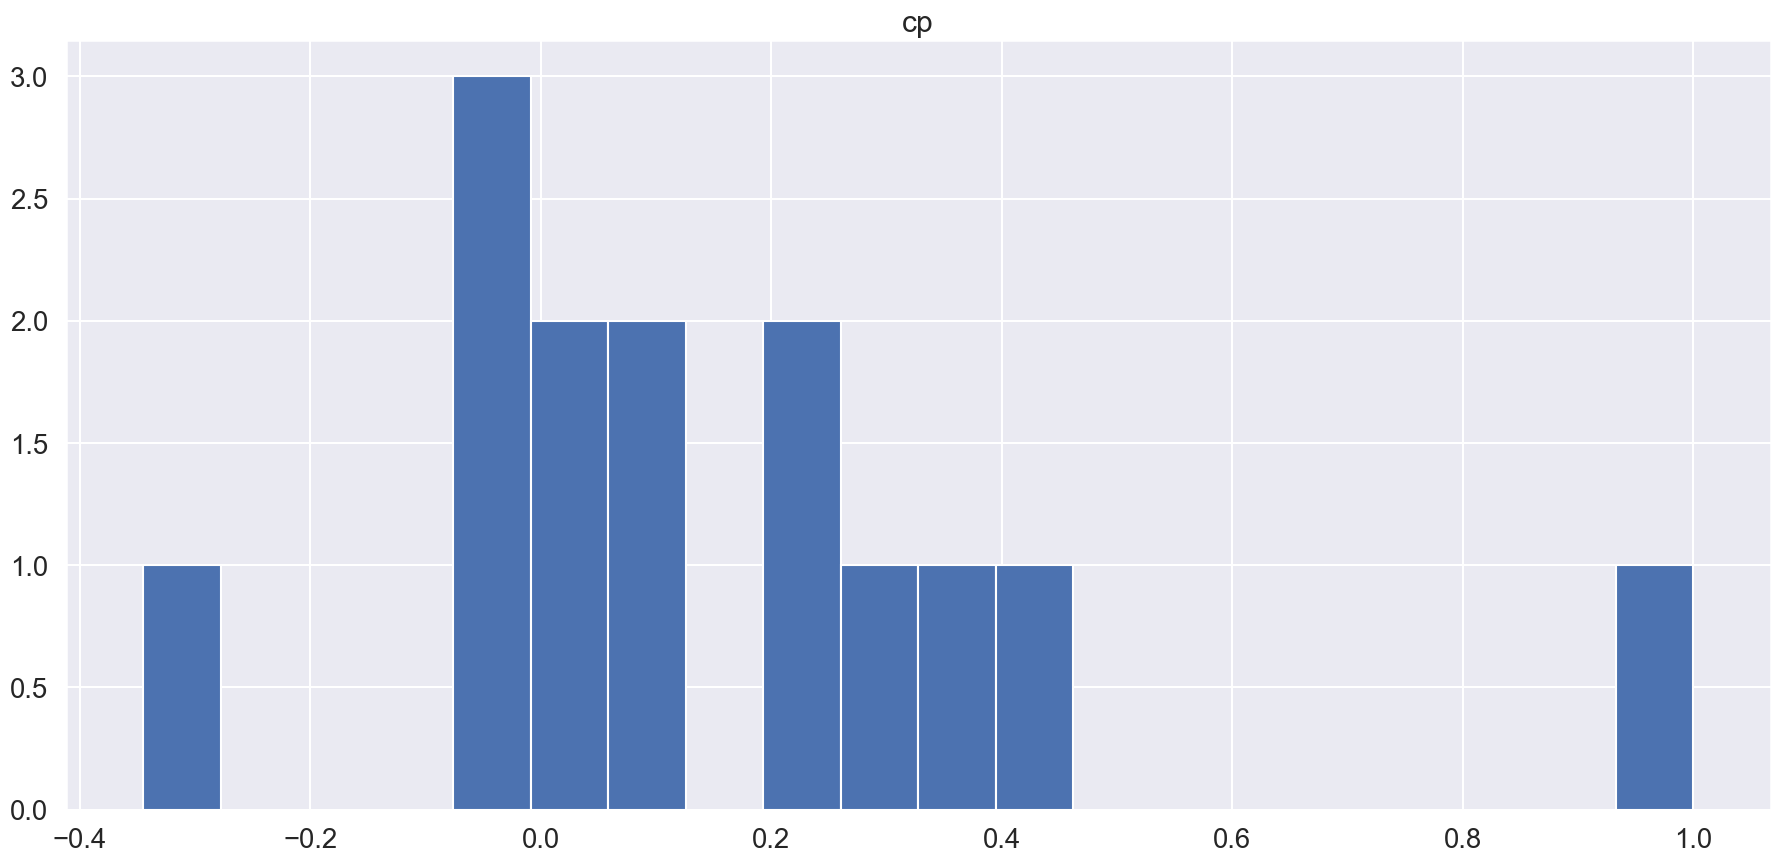

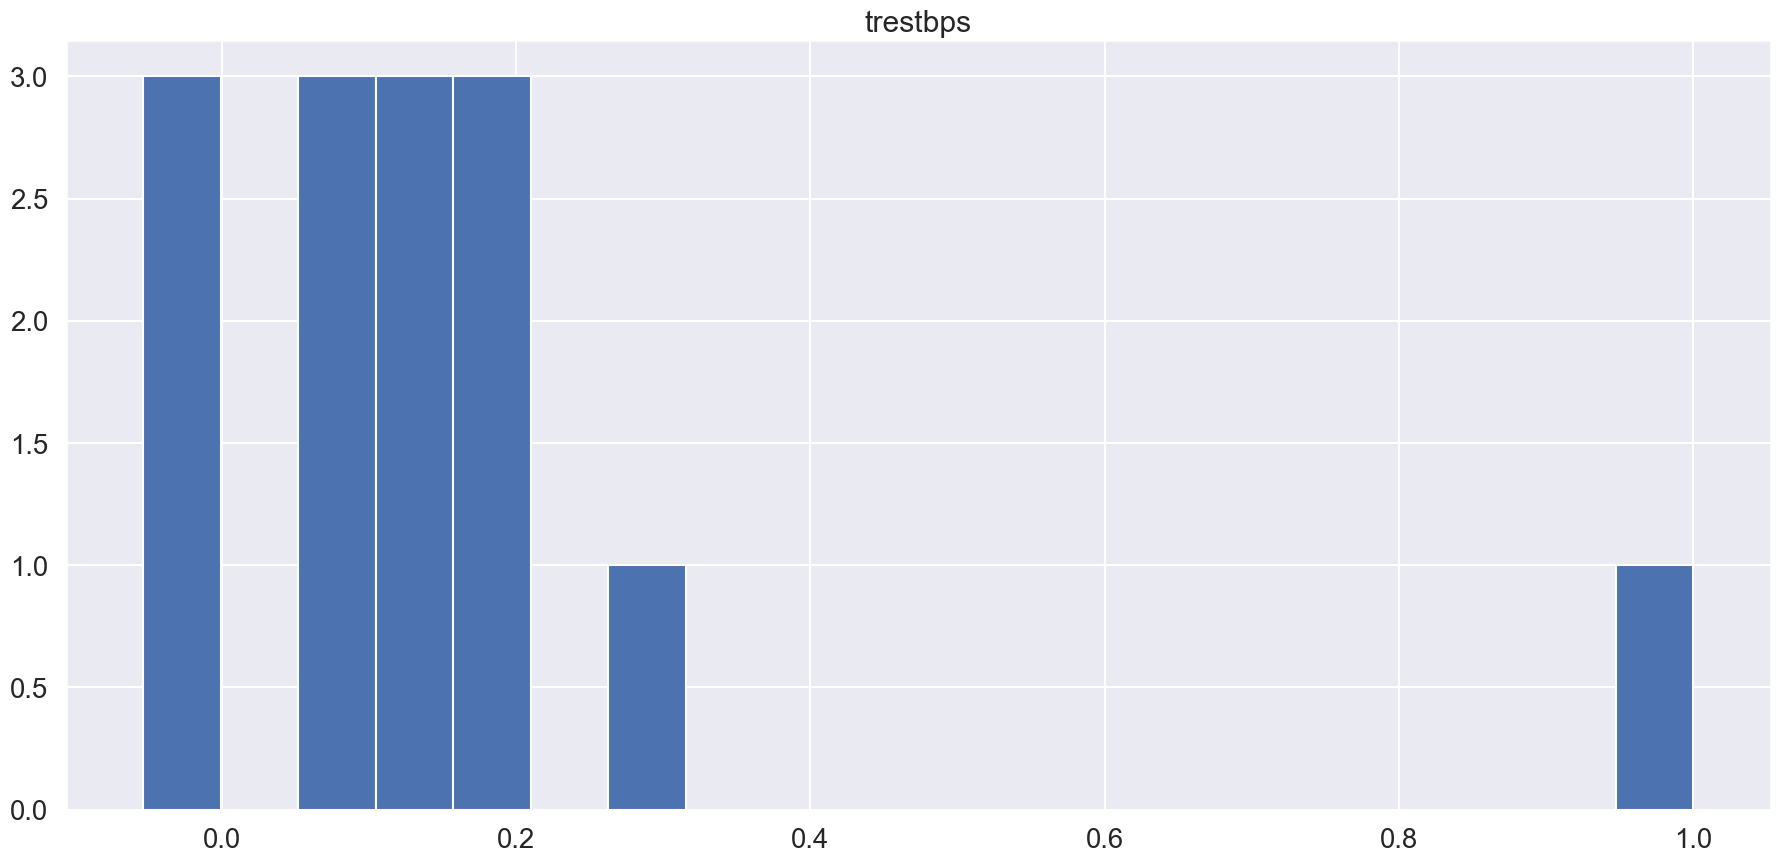

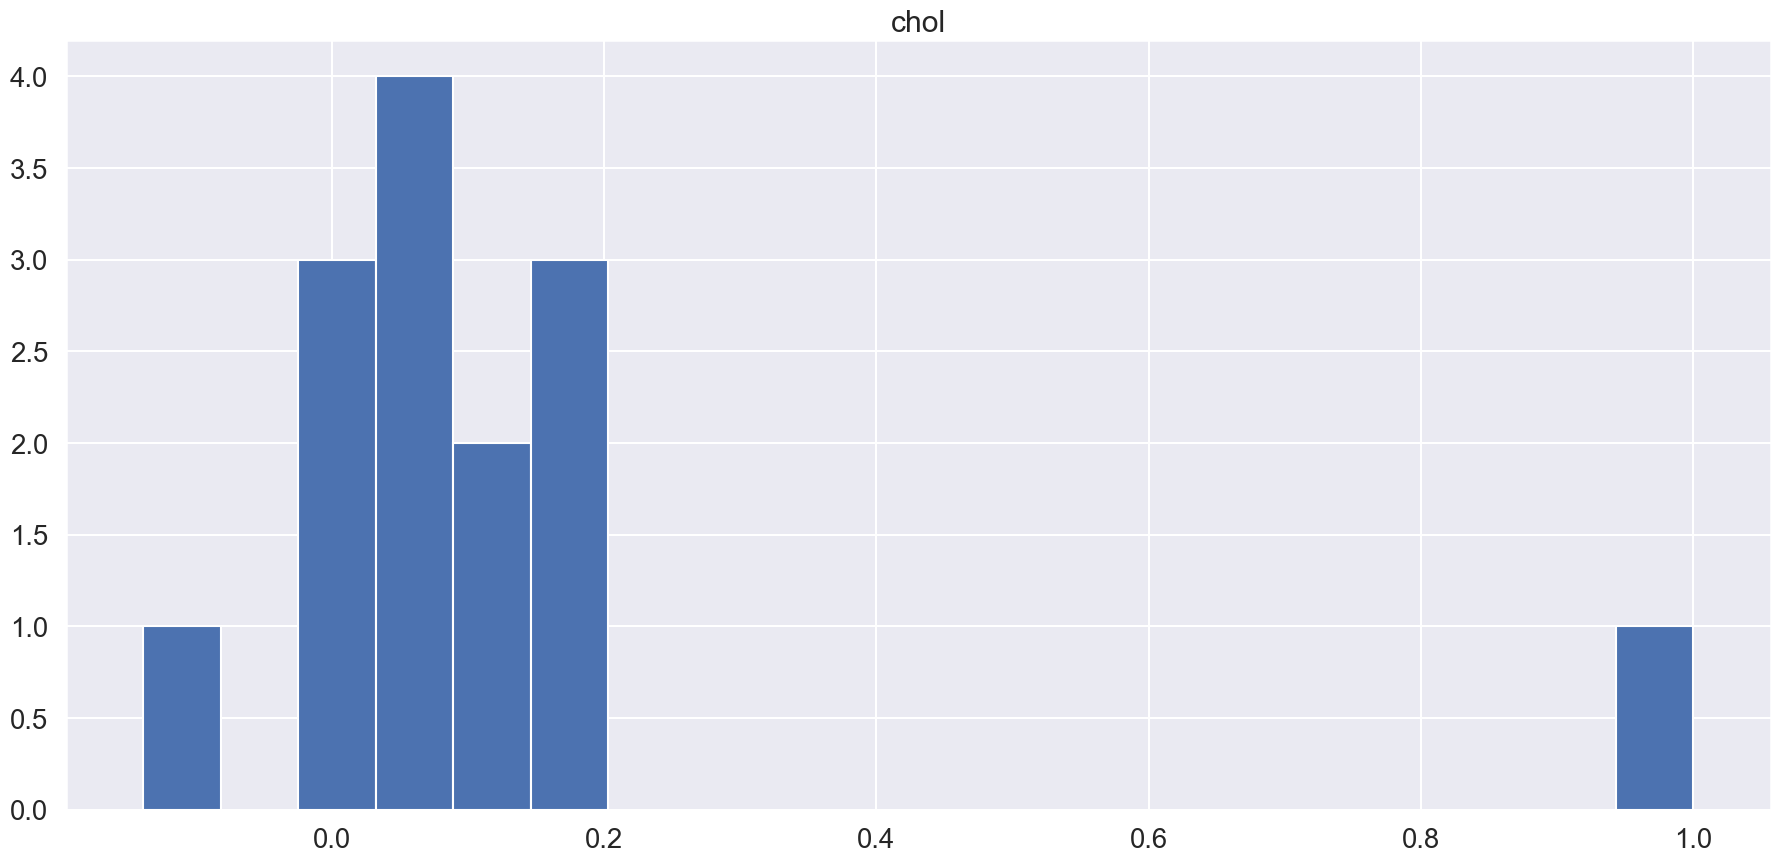

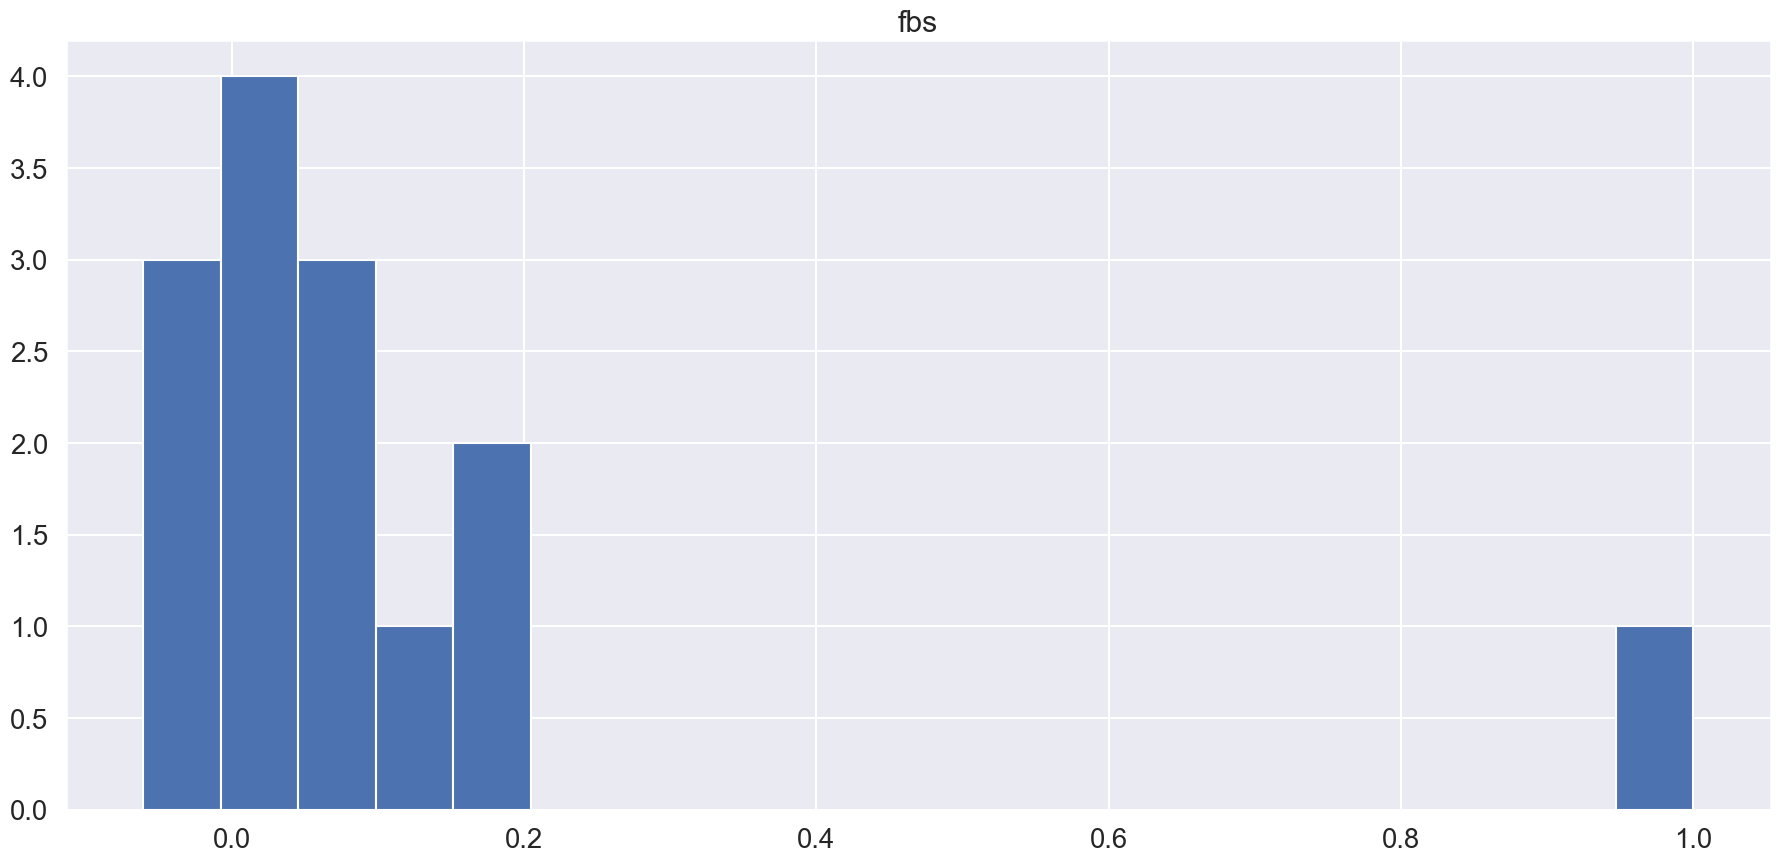

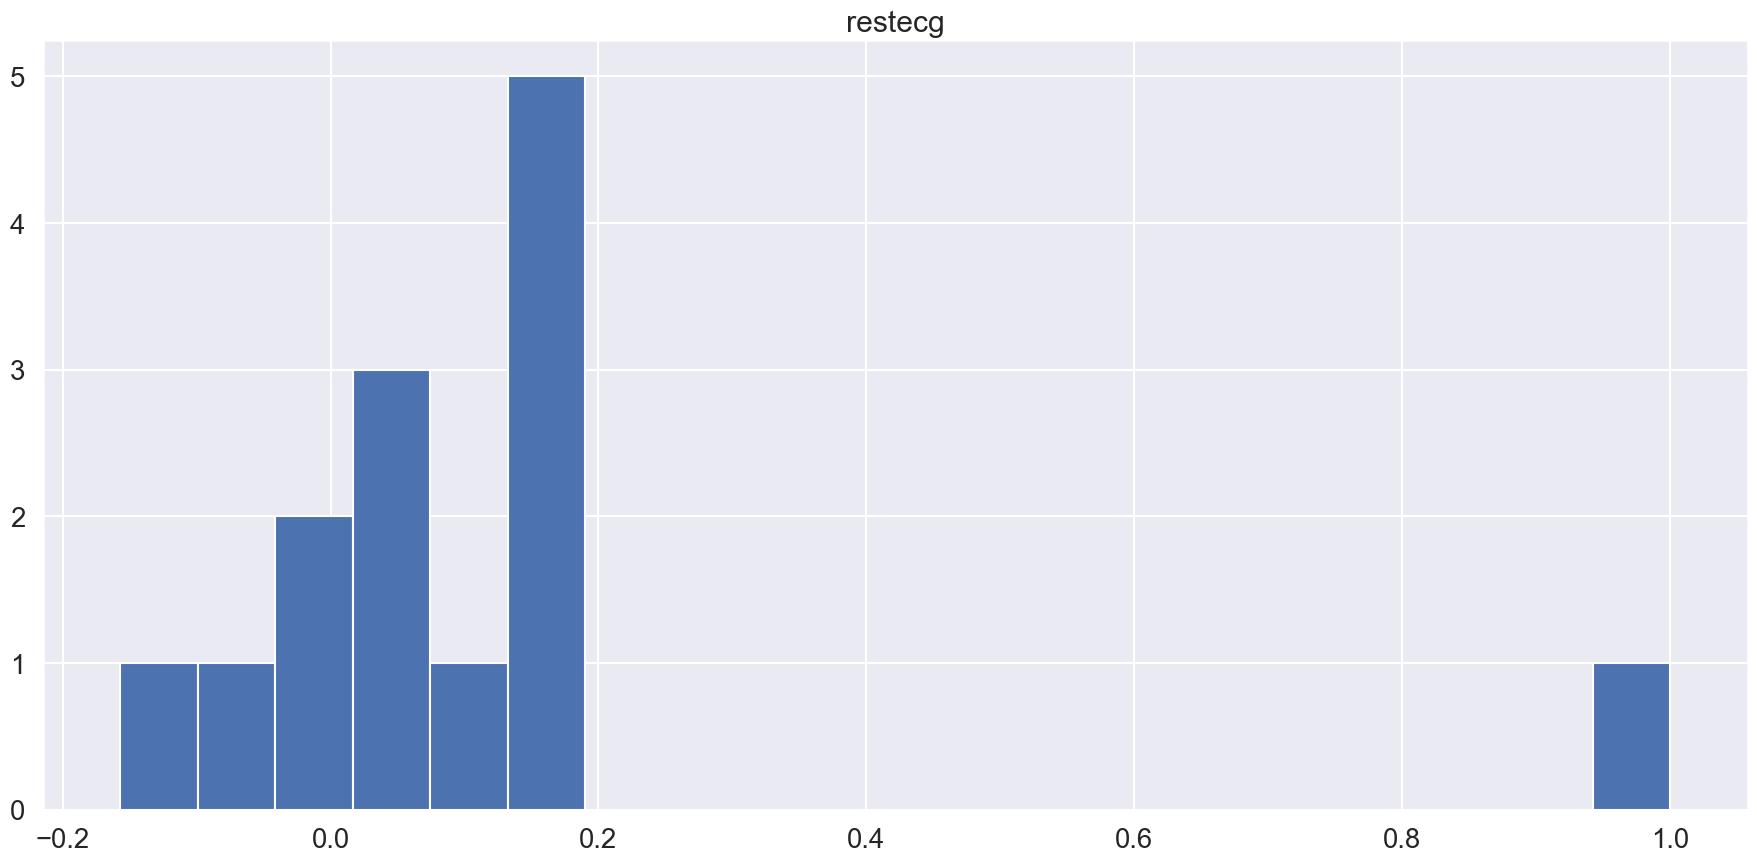

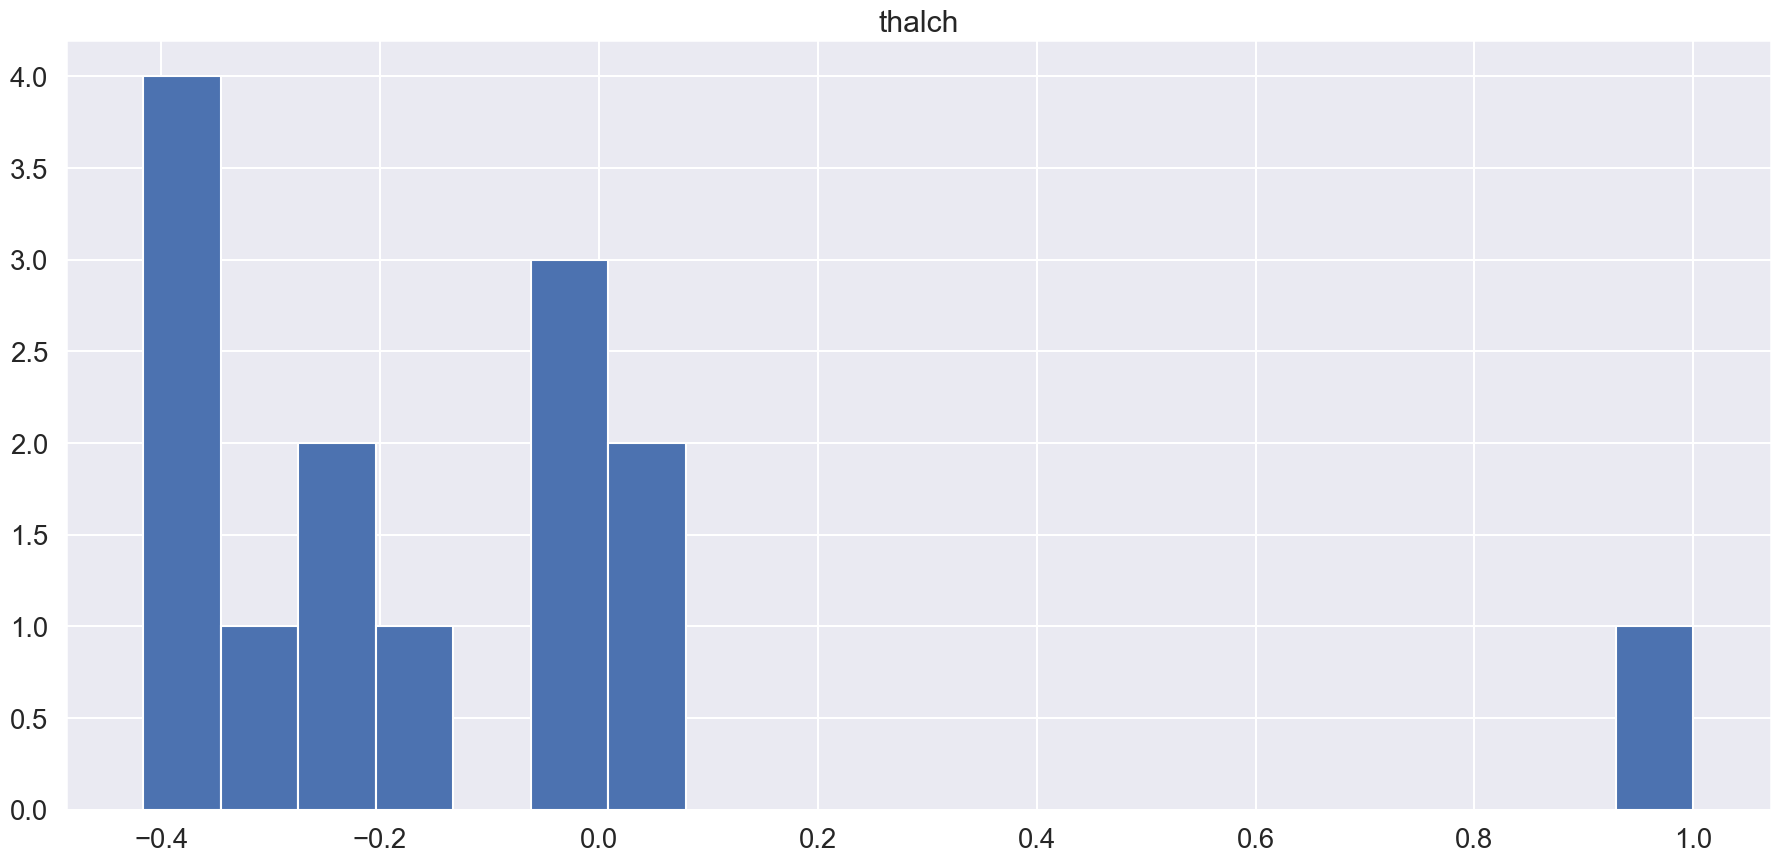

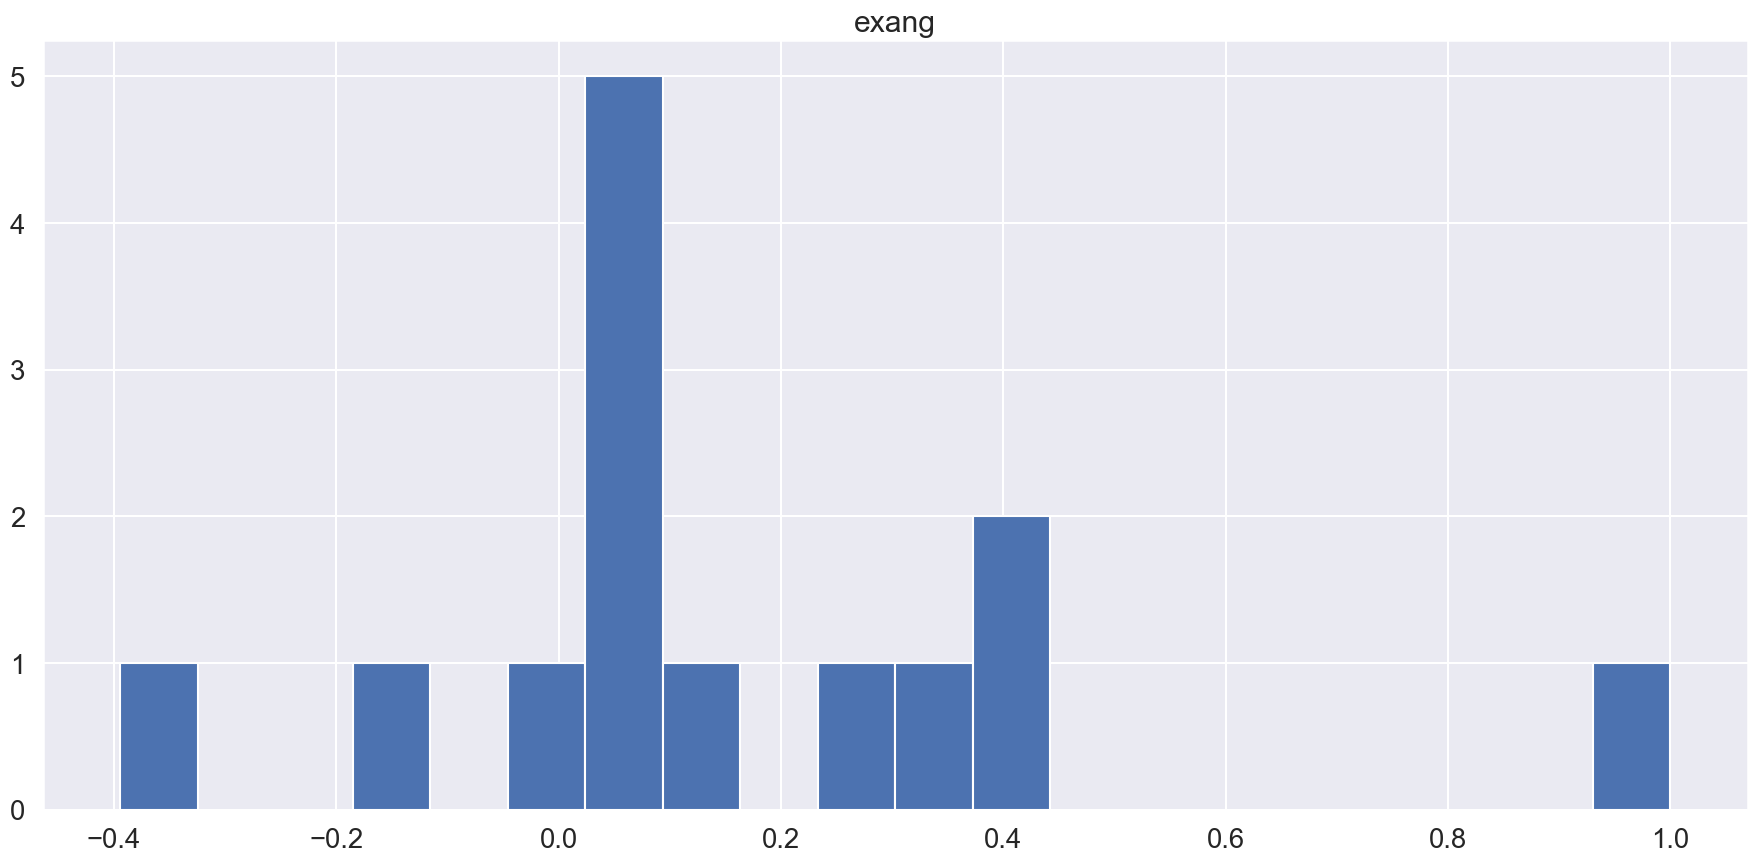

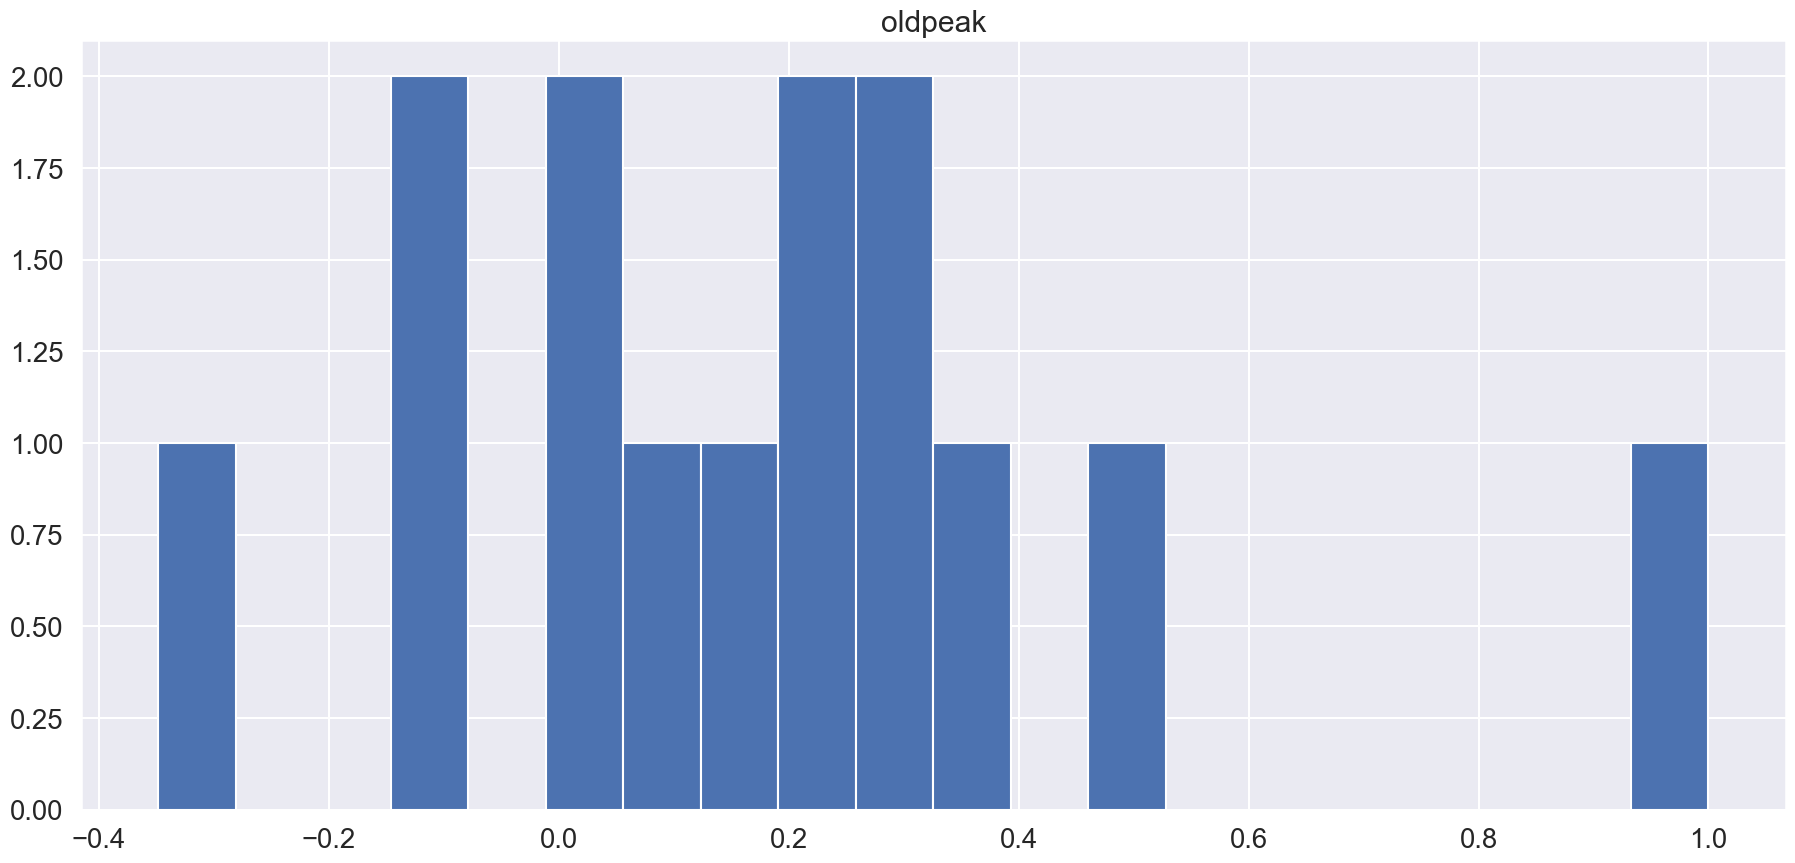

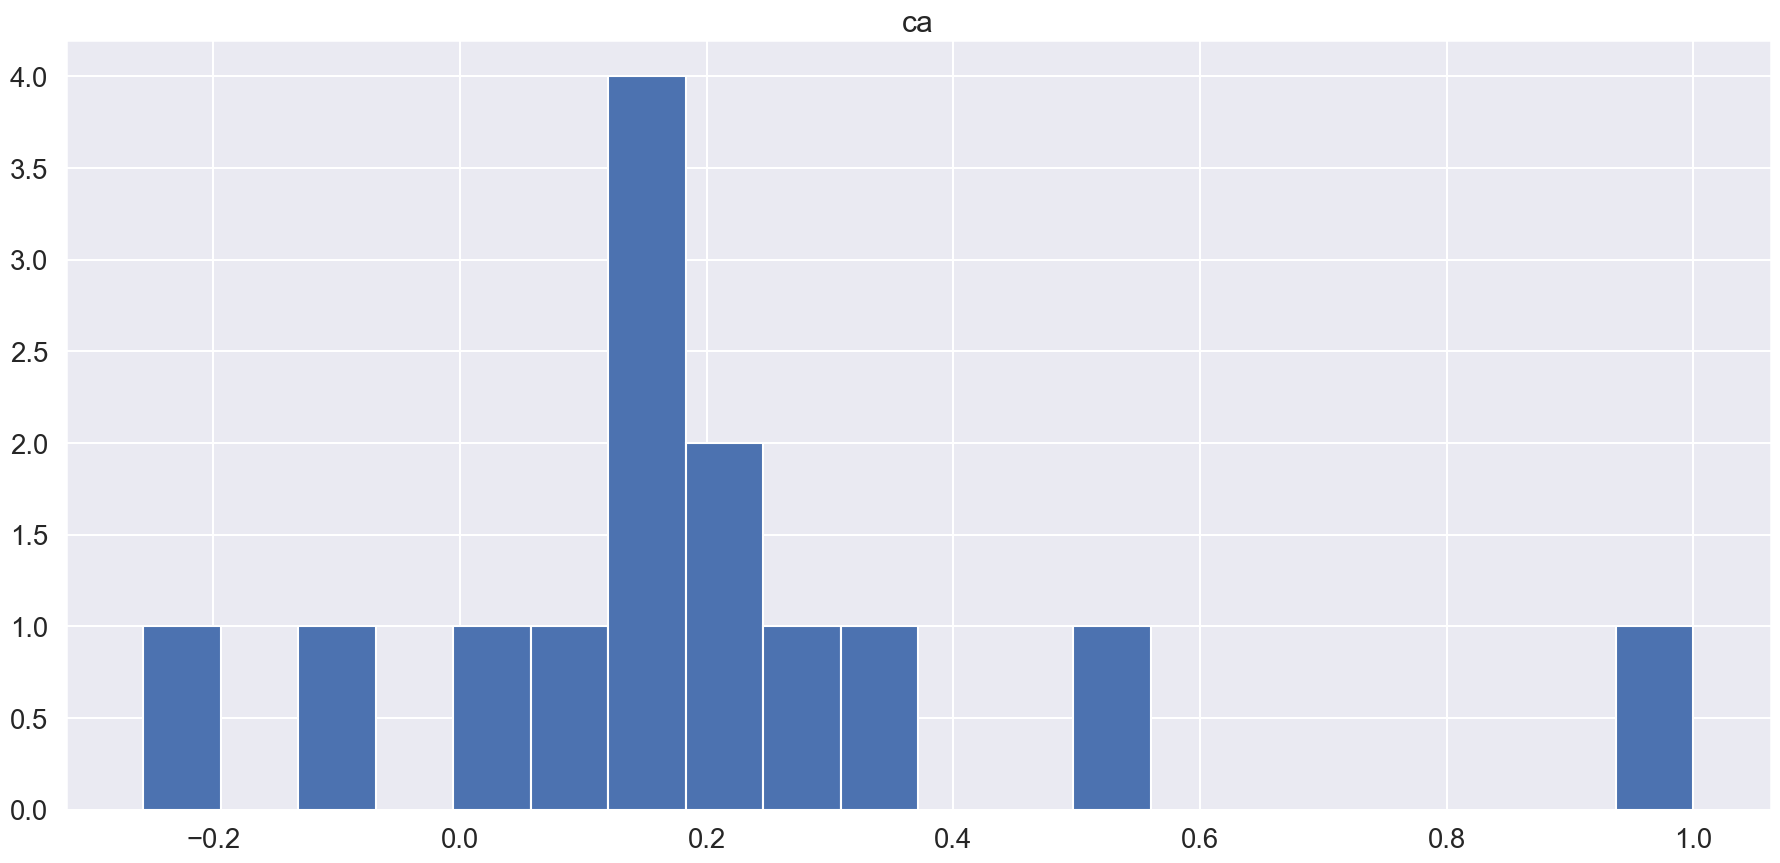

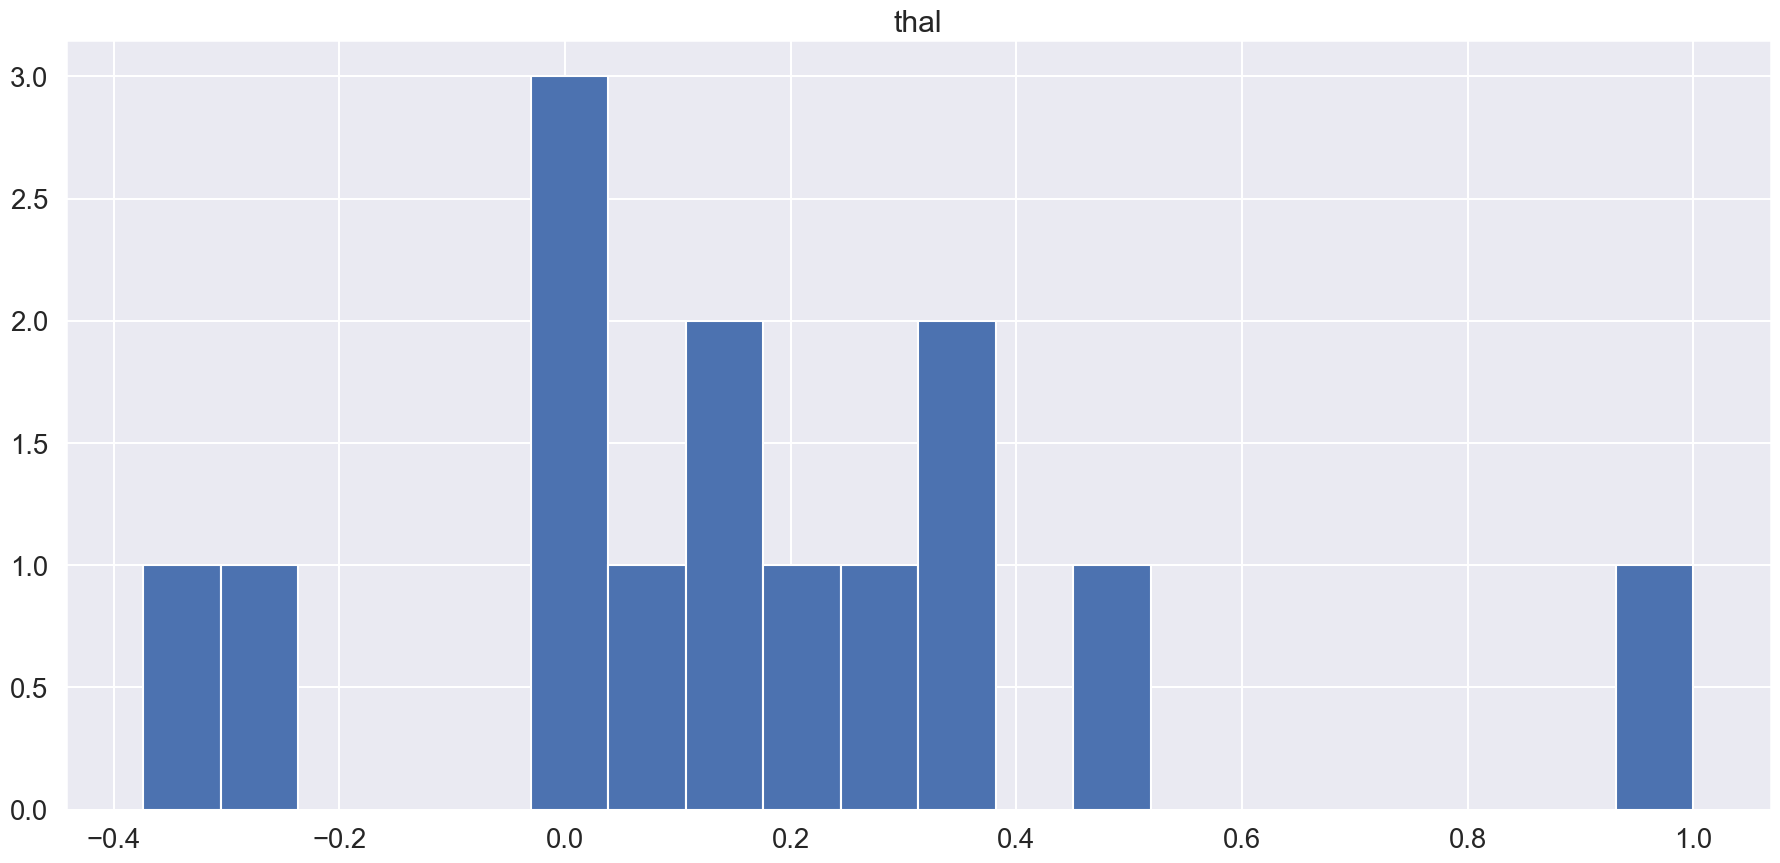

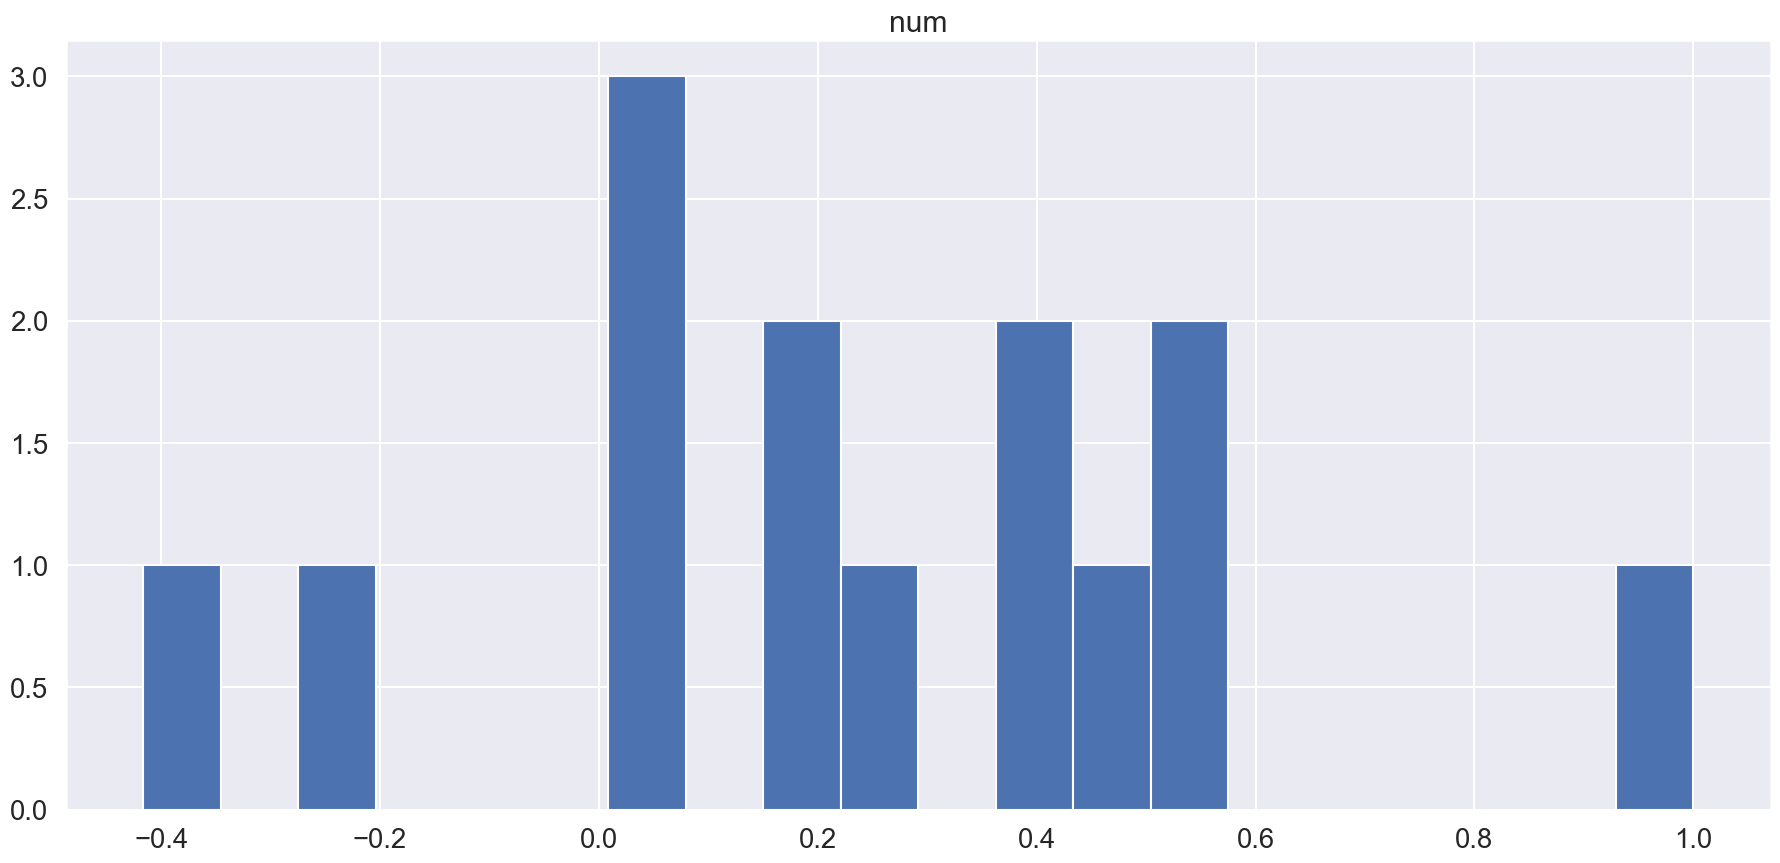

In [38]:
for col in correlation_matrix:
    plt.hist(correlation_matrix[col].values, bins=20)
    plt.title(col)
    plt.show()

Таблиця

In [39]:
dfCleaned.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,thal,num
0,1,63,1,1,145.0,233.0,True,3,150.0,False,2.3,0.0,2,0
1,2,67,1,4,160.0,286.0,False,3,108.0,True,1.5,3.0,1,2
2,3,67,1,4,120.0,229.0,False,3,129.0,True,2.6,2.0,3,1
3,4,37,1,3,130.0,250.0,False,1,187.0,False,3.5,0.0,1,0
4,5,41,2,2,130.0,204.0,False,3,172.0,False,1.4,0.0,1,0


In [40]:
dfCleaned.tail()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,ca,thal,num
299,300,68,1,4,144.0,193.0,True,1,141.0,False,3.4,2.0,3,2
300,301,57,1,4,130.0,131.0,False,1,115.0,True,1.2,1.0,3,3
301,302,57,2,2,130.0,236.0,False,3,174.0,False,0.0,1.0,1,1
508,509,47,1,4,150.0,226.0,False,1,98.0,True,1.5,0.0,3,1
748,749,56,1,4,120.0,100.0,False,1,120.0,True,1.5,0.0,3,1


In [41]:
print(dfHeartDiseaseUci.shape)
print("Number of Rows", dfHeartDiseaseUci.shape[0])
print("Number of Rows", dfHeartDiseaseUci.shape[1])

(920, 16)
Number of Rows 920
Number of Rows 16


In [42]:
dfHeartDiseaseUci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [43]:
dfCleaned.isnull().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
ca          0
thal        0
num         0
dtype: int64

In [44]:
dfHeartDiseaseUci.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000
